<a href="https://colab.research.google.com/github/AdamayB/Tensorflow_Zero_to_Mastery/blob/main/01_Regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network using TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# Create data

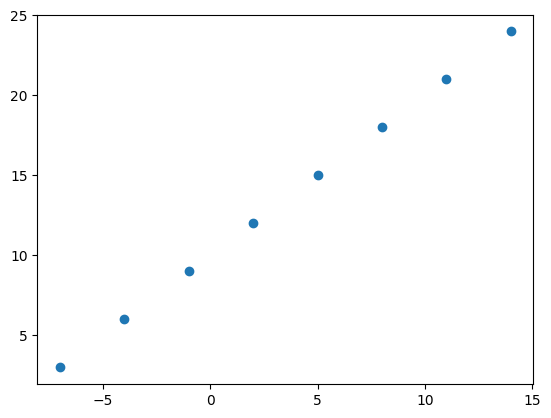

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7,-4,-1,2,5,8,11,14])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]);

# Visualize
plt.scatter(X,y);

# Input and Output shape

In [3]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [4]:
# Turn NumPy arrays to tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. Creating a model
2. Compiling model- define loss function and optimizer and evaluation matrix
3. Fitting the model



In [5]:
tf.random.set_seed(42)

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent)
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)



Epoch 1/5
1/1 [==============================] - 1s 575ms/step - loss: 19.7845 - mae: 19.7845
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 19.5032 - mae: 19.5032
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 19.2220 - mae: 19.2220
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 18.9407 - mae: 18.9407
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 18.6595 - mae: 18.6595


In [6]:
# Trying to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 100ms/step


array([[-18.278246]], dtype=float32)

In [7]:
y_pred=model.predict([99.0])

1/1 [==============================] - 0s 47ms/step


In [8]:
y_pred

array([[-106.624794]], dtype=float32)

In [9]:
y_pred+7.9409

array([[-98.68389]], dtype=float32)

## Improving model
Improving by altering steps while creating model

1. **Creating Model:** Increase number of dense layers and change activation method
2. **Compiling Model:** change optimization function and change learning rate of the optimization function
3. **Fitting Model:**Increase number of epochs or provide more data


In [10]:
# Rebuilding

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent)
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 337ms/step - loss: 14.8665 - mae: 14.8665
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 14.7340 - mae: 14.7340
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 14.6015 - mae: 14.6015
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 14.4690 - mae: 14.4690
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 14.3365 - mae: 14.3365
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 14.2040 - mae: 14.2040
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 14.0715 - mae: 14.0715
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13.9390 - mae: 13.9390
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 13.8065 - mae: 13.8065
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 13.6740 - mae: 13.6740
Epoch 11/100
1/1 [==============================]

In [11]:
y_pred=model.predict([9.0])
y_pred

1/1 [==============================] - 0s 72ms/step


array([[15.968747]], dtype=float32)

In [12]:
# Making more adjustments
# adding extra layer
# Rebuilding

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent)
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 445ms/step - loss: 13.5258 - mae: 13.5258
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.1355 - mae: 13.1355
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.7431 - mae: 12.7431
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.3473 - mae: 12.3473
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.9415 - mae: 11.9415
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 11.5234 - mae: 11.5234
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0897 - mae: 11.0897
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 10.6375 - mae: 10.6375
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 10.1629 - mae: 10.1629
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 9.6598 - mae: 9.6598
Epoch 11/100
1/1 [==============================] 

In [13]:
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 78ms/step


array([[31.800251]], dtype=float32)

## Common ways to improve a deep model(Go Step By Step):
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change Learning rate(Most important hyperparamter to change)
* Fitting on more data
* Fittin longer

In [14]:
# Rebuilding

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 655ms/step - loss: 13.4163 - mae: 13.4163
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.3181 - mae: 13.3181
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 13.2199 - mae: 13.2199
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 13.1217 - mae: 13.1217
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0235 - mae: 13.0235
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9252 - mae: 12.9252
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 12.8269 - mae: 12.8269
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 12.7285 - mae: 12.7285
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 12.6301 - mae: 12.6301
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 12.5316 - mae: 12.5316
Epoch 11/100
1/1 [==============================

In [15]:
y_pred=model.predict([11.])
y_pred

1/1 [==============================] - 0s 113ms/step


array([[20.319971]], dtype=float32)

## Evaluating Model

Typical workflow when building a neural network

`Build a model -> fit it-> evaluate it ->tweak the model-> fit it-> evaluate it ->tweak the model-> fit it-> evaluate it ->tweak the model....`


When evaluating a model, there are 3 words that one must know:
>"Visualize, Visualize and Visualize"

It is a good idea to visualize:
* The data- what data are we working with? What does it look like?
* The model itself- what does our model look like?
* The training of model- how does a model perform while it learns?
* The predictions of the model- how do the predictions of the model line up/ how correct are the predictions?


In [16]:
# Making bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [17]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

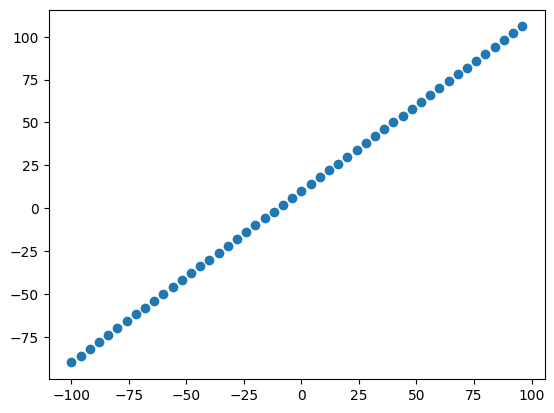

In [20]:
# Visualize data
plt.scatter(X,y)

In [ ]:
# The 3 sets...
